## Seaborn ile Pratik Grafikler

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
plt.style.use("classic") #klasik tipte grafik

In [22]:
%matplotlib inline 

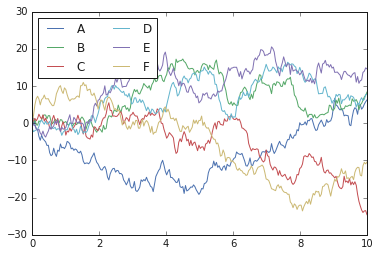

In [23]:
rng=np.random.RandomState() #boş rng nesne
x=np.linspace(0,10,250)
y=np.cumsum(rng.randn(250,6),0)
plt.plot(x,y)
plt.legend("ABCDEF",ncol=2,loc="best")

In [24]:
import seaborn as sns

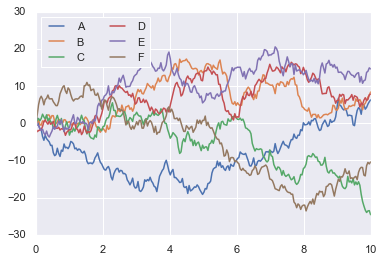

In [25]:
sns.set()
plt.plot(x,y)
plt.legend("ABCDEF",ncol=2,loc="best")#daha anlasilir

In [28]:
iris=pd.read_csv("iris.txt", sep="\t")
iris.head()

,Canak_yaprak_boyu,Canak_yaprak_eni,Tac_yaprak_boyu,Tac_yaprak_eni,Turu
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


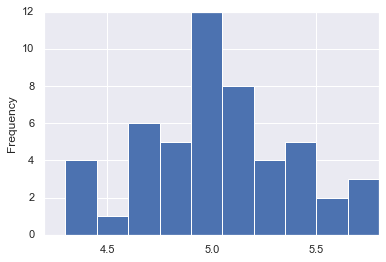

In [29]:
setosa=iris.loc[iris.Turu=="setosa"]
virginica=iris.loc[iris.Turu=="virginica"]
setosa.Canak_yaprak_boyu.plot.hist()

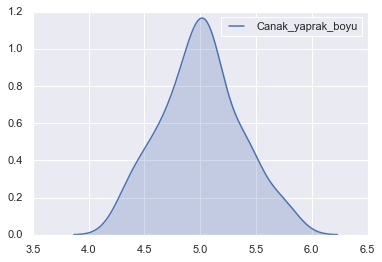

In [30]:
sns.kdeplot(setosa.Canak_yaprak_boyu, shade=True,color="b")

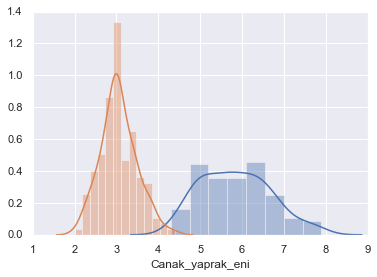

In [32]:
sns.distplot(iris.Canak_yaprak_boyu)
sns.distplot(iris.Canak_yaprak_eni)

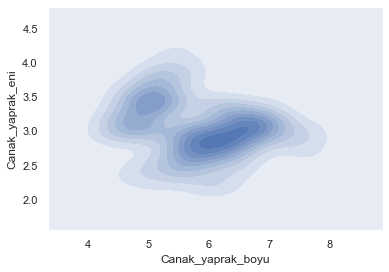

In [34]:
sns.kdeplot(iris.Canak_yaprak_boyu,iris.Canak_yaprak_eni,shade=True)

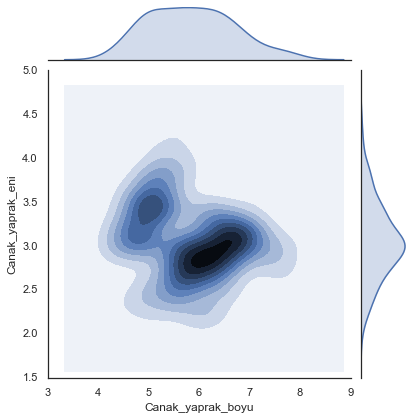

In [37]:
with sns.axes_style("white"):
    sns.jointplot("Canak_yaprak_boyu", "Canak_yaprak_eni", data=iris, kind="kde")
#Iki boyutlu yogunluk ile birlesik dagilim grafigi    

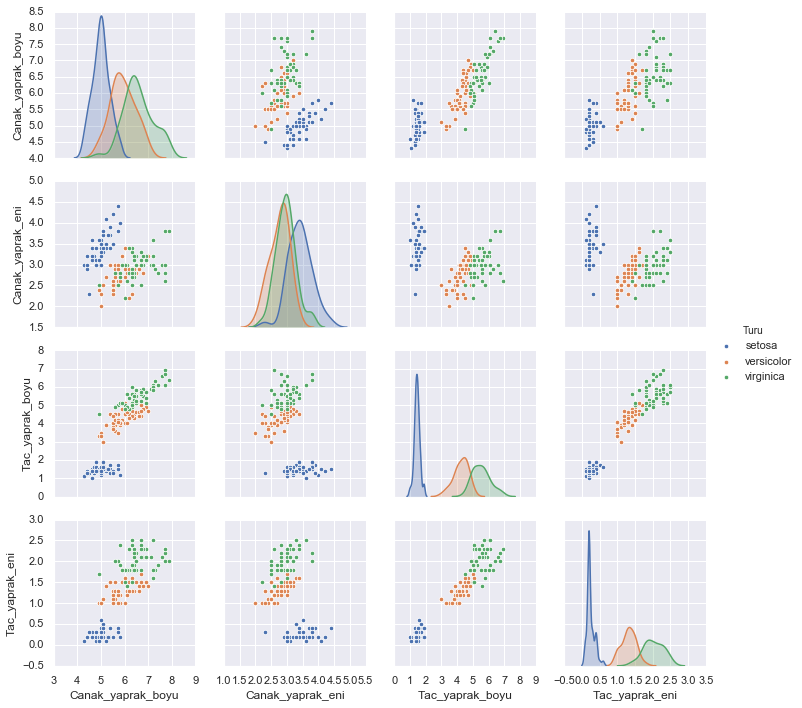

In [38]:
sns.pairplot(iris,hue="Turu")

In [47]:
bahsis=sns.load_dataset("tips")#direk internetten indirme
bahsis.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
bahsis["bahsis_yuzde"]= bahsis["tip"]*100/bahsis["total_bill"]
bahsis.head()

,total_bill,tip,sex,smoker,day,time,size,bahsis_yuzde
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


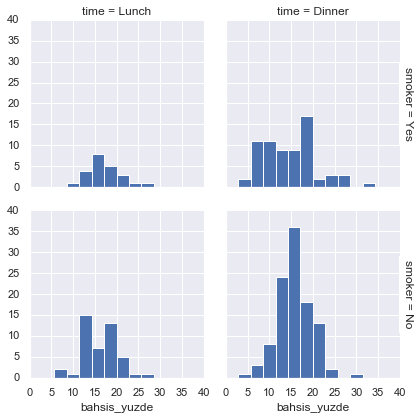

In [52]:
grid=sns.FacetGrid(bahsis, row="smoker", col="time", margin_titles=True)
grid.map(plt.hist, "bahsis_yuzde", bins=np.linspace(0,40,15))

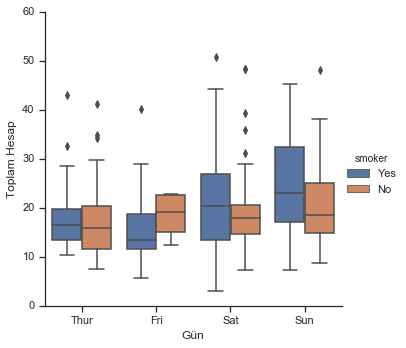

In [53]:
with sns.axes_style(style="ticks"):
    g=sns.catplot("day","total_bill","smoker",data=bahsis, kind="box")
    g.set_axis_labels("Gün","Toplam Hesap")

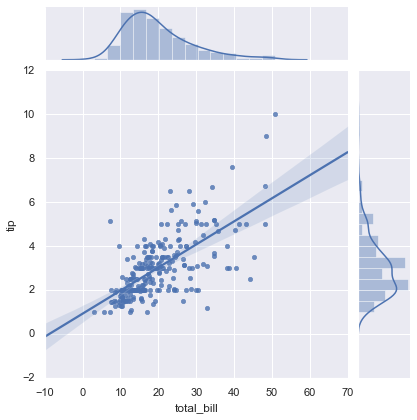

In [54]:
sns.jointplot("total_bill","tip",data=bahsis, kind="reg")

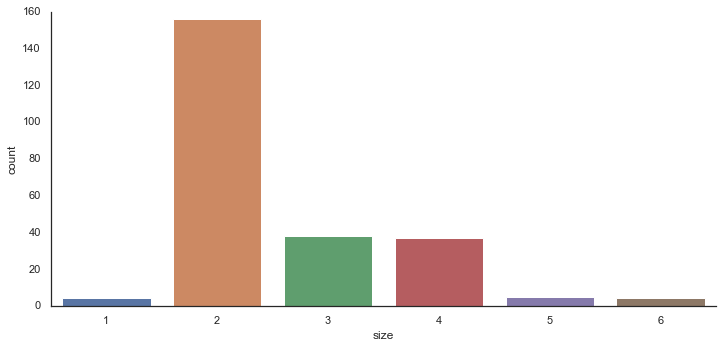

In [55]:
with sns.axes_style("white"):
    g=sns.catplot("size",data=bahsis, aspect=2,kind="count")